In [1]:
using QuantumOptics
using Plots

In [2]:
# operators
s = SpinBasis(1//2)
sy = sigmay(s)
sx = sigmax(s)
sz = sigmaz(s)
I = identityoperator(s)
nothing

In [3]:
# Hamiltonian
h = sqrt(1*4)*(sx⊗sx⊗I⊗I⊗I + sy⊗sy⊗I⊗I⊗I) +
    sqrt(2*3)*(I⊗sx⊗sx⊗I⊗I + I⊗sy⊗sy⊗I⊗I) +
    sqrt(3*2)*(I⊗I⊗sx⊗sx⊗I + I⊗I⊗sy⊗sy⊗I) +
    sqrt(4*1)*(I⊗I⊗I⊗sx⊗sx + I⊗I⊗I⊗sy⊗sy)
nothing

In [43]:
# initial state
ψ0 = spindown(s)⊗spindown(s)⊗spindown(s)⊗spindown(s)⊗spinup(s)

# evolution
tspan = [0:pi/200:pi/2;]
tout, ψt = timeevolution.schroedinger(tspan, ψ0, h)
nothing

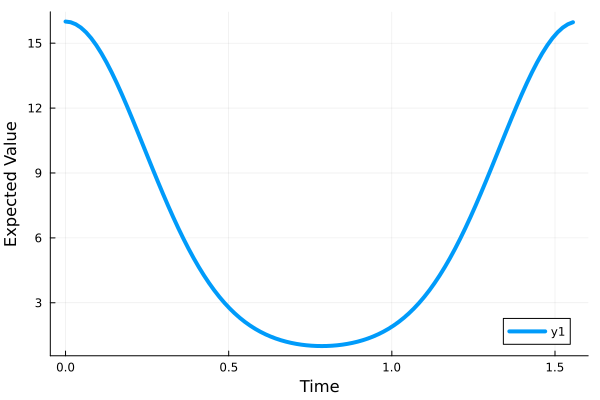

In [57]:
# visualization
n1 = (real(expect(1, sz, ψt)).+1)/2
n2 = (real(expect(2, sz, ψt)).+1)/2
n3 = (real(expect(3, sz, ψt)).+1)/2
n4 = (real(expect(4, sz, ψt)).+1)/2
n5 = (real(expect(5, sz, ψt)).+1)/2
n = n1 + n2*2 + n3*4 + n4*8 + n5*16
plot(
    tout, n, lw=4,
    xlabel = "Time",
    ylabel = "Expected Value",
    size=(600,400)
)